# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Ignacio Negrete
- Nombre de alumno 2: Camila Salas

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/ignacio3645/MDS7202.git)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.




### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

Los datos de entrenamiento son los que se utilizan para entrenar el modelo y los de validación son datos distintos de los de entrenamiento, que se utilizan para evaluar el rendimiento del modelo entrenado.

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

Al querer trabajar con clasificación con data que no se encuentra etiquetada, el principal desafío es lograr obtener resultados iguales o mejores, comparado a si se trabaja con etiquetas.

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

La matriz de confusión es una matriz, valga la redundancia, que muestra los resultados obtenidos al clasificar, comparando su desempeño real con lo predicho.

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy: es la proporción de clasificaciones correctas sobre el total de predicciones

  accuracy = (TP+TN) / (TP+TN+FP+FN)


  * Precision: es la proporción de clasificaciones correctas considerando el total de clasificaciones positivas, ya sean correctas o incorrectas

  precision = TP / (TP+FP)

  * Recall: es la proporción de clasificaciones correctas considerando el total de positivos reales.

  recall =  TP / (TP+FN)


  * F1 score: métrica más generalizada que logra balancear precision y recall 

  f1_score = 2 * precision * recall / (precision + recall) 



5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera: recomendaría f1-score, debido a que si dejo pasar un falso negativo y no se hace la mantención, entonces podría conllevar en un accidente, pero por otro lado, realizar mantenciones innecesarias, es un costo a considerar.
  * Detección de enfermedades altamente contagiosas: recomendaría utilizar la métrica recall ya que se puede saber que tan buena está siendo la detección considerando todos los valores positivos, lo cual es importante ya que un falso negativo implicaría mayor cantidad de contagios.
  * Aprobación de créditos de alto riesgo: debido a que se quiere ver la aprobación de un crédito, recomendaría accuracy para poder observar el porcentaje de aprobaciones correctas en este caso de alto riesgo y ver si es conveniente.
  * Detección de crímenes: de la misma manera en que podría ser peligroso detectar como falso negativo en la salud, también lo podría ser si un criminal está suelto por la calle, por lo que se recomienza recall.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]

La calibración de modelos es cuando se quiere que las salidas del modelo se encuentran entre 0 y 1, por lo que se usa para poder interpretar estos valores como probabilidades. 



# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [32]:
# # Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
# try:
#     from google.colab import drive
#     drive.mount("/content/drive")
#     path = 'Dirección donde tiene los archivos en el Drive'
# except:
#     print('Ignorando conexión drive-colab')

In [33]:
import pandas as pd

datos = pd.read_csv('stats_players.csv')
datos

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [34]:
# Se generan los labels a partir de la columna National Position
import numpy as np
label = pd.DataFrame(np.where(pd.isna(datos['National_Position']), 0, 1))
label

,0
0,1
1,1
2,1
3,1
4,1
...,...
17583,0
17584,0
17585,0
17586,0


In [35]:
# Se calcula la cantidad por cada clase
label.value_counts()

0    16513
1     1075
Name: count, dtype: int64

**Respuesta:** A partir de la creación de la columna 'label' en los datos, se puede observar que la cantidad de ejemplos por clase se encuentra altamente desbalanceada, con la mayor cantidad para la clase 0. Lo anterior puede dificultar el entrenamiento, detectando de mejor forma la clase 0 que la clase 1.

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

datos1 = datos.copy()

# Se eliminan las columnas national position y nombres
datos1 = datos1.drop(columns=['Name', 'National_Position'])

col_categ = ['Nationality', 'Club_Position', 'Preffered_Foot', 'Work_Rate', 'Weak_foot', 'Skill_Moves'] #categoricas 

col_num = datos1.columns.drop(['Nationality', 'Club_Position', 'Preffered_Foot', 'Work_Rate', 'Weak_foot', 'Skill_Moves']).to_list() # columnas numericas

# Se crean os pipelines para las columnas categoricas y numericas
numeric_trans = Pipeline([('standardscaler', StandardScaler())])

categ_trans = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Se crea el column transformer a aplicar sobre los datos
column_transformer = ColumnTransformer([('numerica', numeric_trans, col_num),
                                        ('categoricas', categ_trans, col_categ)],
                                        verbose_feature_names_out = False)

column_transformer.set_output(transform='pandas')

datos_trans = column_transformer.fit_transform(datos1)
datos_trans

,Height,Weight,Age,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,...,Weak_foot_1,Weak_foot_2,Weak_foot_3,Weak_foot_4,Weak_foot_5,Skill_Moves_1,Skill_Moves_2,Skill_Moves_3,Skill_Moves_4,Skill_Moves_5
0,0.583453,0.688144,1.397344,2.080706,1.966716,-1.031039,-1.048847,-0.753239,0.405838,3.690524,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.663748,-0.471654,0.756330,2.199511,2.231080,-1.448458,-0.909407,-0.890682,-0.454009,3.582707,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.064495,-1.051553,-0.098356,2.199511,2.178207,-1.077419,-0.584046,-1.073940,0.004576,2.827986,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.134013,1.413018,0.970001,1.961901,1.649479,-0.660000,-0.351645,-0.111837,1.265685,3.367072,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.781960,2.427841,1.183672,-0.592407,-1.311397,-1.587597,-1.606609,-1.715342,-1.543148,2.504534,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,0.283826,0.978093,-1.380384,-2.730898,-2.315980,-1.494838,-1.560129,-1.577898,-1.772441,-1.484707,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17584,0.583453,0.688144,-1.380384,-2.671496,-2.315980,-1.541217,-1.560129,-1.669527,-2.345672,-2.023794,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17585,-1.214308,-2.066377,-1.594055,-0.830018,-0.835542,-0.196202,-0.769967,-0.569981,-0.683301,-2.131611,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17586,-0.165614,0.688144,-0.953041,-2.433886,-2.210235,-1.541217,-1.606609,-1.532084,-1.887087,-1.700342,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Respuesta 1.1.4:** 
La elección de transformaciones se dividió entre la categoría categórica y numérica, donde en el caso de las columnas numéricas se aplicó StandardScaler para aproximarlos todos a una distribución normal considerando que la gran mayoría presenta este comportamiento o 'cercano'. Por otro lado, a pesar de aumentar la cantidad de columnas, se consideró OneHotEncoder para transformar las categorías a valores numéricos para poder realizar el entrenamiento más adelante.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\Camila\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\Camila\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
# Se dividen los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datos1, label, test_size=0.3, random_state=42, shuffle=True, stratify=label) # se hace de manera aleatoria, manteniendo la distribucion original

In [40]:
import xgboost as xgb
import lightgbm as lgb

# Se definen los pipelies solicitados
pipeline_xgboost = Pipeline([('column_transformer', column_transformer),
                             ('xgboost', xgb.XGBClassifier())])
pipeline_lightgbm = Pipeline([('column_transformer', column_transformer),
                             ('lightgbm', lgb.LGBMClassifier())])

# Se entrenan los pipelines
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 752, number of negative: 11559
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2663
[LightGBM] [Info] Number of data points in the train set: 12311, number of used features: 148
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061084 -> initscore=-2.732483
[LightGBM] [Info] Start training from score -2.732483


Pipeline(memory=None,
         steps=[('column_transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerica',
                                                  Pipeline(memory=None,
                                                           steps=[('standardscaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', '...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100,
                                n_jobs=None, num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [41]:
# Se quiere juntar ytest con y_xgb predicho de xgboost y de lightgbm 
y_xgb = y_test.copy()
y_gbm = y_test.copy()

# Se cambia el nombre de la columna
y_xgb.columns = ['y_test']
y_gbm.columns = ['y_test']

# Se agrega el predicho
y_xgb['y_pred_xgboost'] = pipeline_xgboost.predict(X_test)
y_gbm['y_pred_lightgbm'] = pipeline_lightgbm.predict(X_test)

y_xgb

,y_test,y_pred_xgboost
5395,1,0
15229,0,0
3954,0,0
6748,0,0
11051,0,0
...,...,...
1583,0,0
12514,0,0
16929,0,0
13772,0,0


In [42]:
y_gbm

,y_test,y_pred_lightgbm
5395,1,0
15229,0,0
3954,0,0
6748,0,0
11051,0,0
...,...,...
1583,0,0
12514,0,0
16929,0,0
13772,0,0


In [43]:
# Se considera solo la clase positiva
y_xgb1 = y_xgb[y_xgb['y_test'] == 1]
y_xgb1

,y_test,y_pred_xgboost
5395,1,0
2301,1,0
3454,1,0
10177,1,0
266,1,0
...,...,...
6437,1,0
0,1,1
2915,1,0
832,1,0


In [44]:
# Se consideran solo la clase positiva
y_gbm1 = y_gbm[y_gbm['y_test'] == 1]
y_gbm1

,y_test,y_pred_lightgbm
5395,1,0
2301,1,0
3454,1,0
10177,1,0
266,1,0
...,...,...
6437,1,0
0,1,1
2915,1,0
832,1,0


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

# Se calcula accuracy, precision y recall 
# xgboost
acc_xgb = accuracy_score(y_xgb1['y_test'], y_xgb1['y_pred_xgboost'])
prec_xgb = precision_score(y_xgb1['y_test'], y_xgb1['y_pred_xgboost'])
recall_xgb = recall_score(y_xgb1['y_test'], y_xgb1['y_pred_xgboost'])

# lightgbm
acc_gbm = accuracy_score(y_gbm1['y_test'], y_gbm1['y_pred_lightgbm'])
prec_gbm = precision_score(y_gbm1['y_test'], y_gbm1['y_pred_lightgbm'])
recall_gbm = recall_score(y_gbm1['y_test'], y_gbm1['y_pred_lightgbm'])


# Se printean los resultados
print('Accuracy xgboost: ', acc_xgb)
print('Precision xgboost: ', prec_xgb)
print('Recall xgboost: ', recall_xgb)
print(' ')
print('Accuracy lightgbm: ', acc_gbm)
print('Precision lightgbm: ', prec_gbm)
print('Recall lightgbm: ', recall_gbm)

Accuracy xgboost:  0.33126934984520123
Precision xgboost:  1.0
Recall xgboost:  0.33126934984520123
 
Accuracy lightgbm:  0.33746130030959753
Precision lightgbm:  1.0
Recall lightgbm:  0.33746130030959753


In [46]:
# Ahora se obtienen los classification report
# xgboost
cf_xgb = classification_report(y_xgb1['y_test'], y_xgb1['y_pred_xgboost'])

print('Classification report xgboost:')
print(cf_xgb)

Classification report xgboost:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50       323

    accuracy                           0.33       323
   macro avg       0.50      0.17      0.25       323
weighted avg       1.00      0.33      0.50       323



In [47]:
# y classification report para lightgbm
cf_gbm = classification_report(y_gbm1['y_test'], y_gbm1['y_pred_lightgbm'])

print('Classification report lightgbm:')
print(cf_gbm)

Classification report lightgbm:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.34      0.50       323

    accuracy                           0.34       323
   macro avg       0.50      0.17      0.25       323
weighted avg       1.00      0.34      0.50       323



**Respuesta 1.3.2:** en este caso, el valor de precision es igual a 1 debido a que no se obtuvieron falsos positivos, por lo que no se obtuvieron 1's cuando debieron ser ceros. En el caso de recall, se puede notar un valor bastante bajo, lo que se debe a que ahora la cantidad de falsos negativos es alta, osea alta la cantidad de valores detectados como 0's cuando debieron ser 1's. Por último, accuracy, también presenta un valor bajo debido a que la cantidad de positivos detectados es baja. 

Este comportamiento, se relaciona con el desbalance de clases, debido a que el modelo aprende a identificar de mejor manera la clase mayoritaria, obteniendo así una gran cantidad de falsos negativos.

**Respuesta 1.3.3:** dentro de las 3 métricas, la que parece ser la mejor a considerar es recall, debido a que viendo las fórmulas, aunque precision es cercano a 1, lo cual es debido a que no se detectaron falsos positivos, al observar recall se puede notar que es bajo, lo que muestra que hay una alta cantidad de falsos negativos. En este caso, al tener clases desbalanceadas es que es una buena métrica a considerar.

En relación a los modelos, en relación a lo que se mencionó anteriormente, el mejor es lightgbm, pero esto solo se considera por tener un mejor recall. Ahora, se observa que la diferencia es mínima, por lo que se podría decir que son bastante parecidos.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [48]:
from sklearn.preprocessing import LabelEncoder

#Diccionario para mapear variantes a una posición base
map_posicion_base = {
    'ST': 'ST', 'CF': 'CF', 'LF': 'CF', 'RF': 'CF', 'LS': 'ST', 'RS': 'ST',
    'LW': 'LW', 'RW': 'RW',
    'CAM': 'CAM', 'LAM': 'CAM', 'RAM': 'CAM',
    'CM': 'CM', 'RCM': 'CM', 'LCM': 'CM',
    'CDM': 'CDM', 'RDM': 'CDM', 'LDM': 'CDM',
    'RM': 'RM', 'LM': 'LM',
    'RWB': 'RWB', 'LWB': 'LWB',
    'RB': 'RB', 'CB': 'CB', 'LB': 'LB', 'RCB': 'CB', 'LCB': 'CB',
    'GK': 'GK'
}

#creamos un nuevo df para esta pregunta
datos2 = datos.copy()

#Reemplazar por la posición base
datos2['pos_base'] = datos2['Club_Position'].map(map_posicion_base)

#Ahora si asignamos a las categorias mas generales
def asignar_rol(pos):
    if pos in ['ST', 'CF']:
        return 'ataque'
    elif pos in ['RW', 'CAM', 'LW']:
        return 'central_ataque'
    elif pos in ['RM', 'CM', 'LM']:
        return 'central'
    elif pos in ['RWB', 'CDM', 'LWB']:
        return 'central_defensa'
    elif pos in ['RB', 'CB', 'LB']:
        return 'defensa'
    elif pos == 'GK':
        return 'arquero'
    else:
        return None


#Como no debemos usar las 'posiciones' sub y res las eliminamos.
datos2 = datos2[~datos2['Club_Position'].isin(['Sub', 'Res'])]


datos2['pos_label'] = datos2['pos_base'].apply(asignar_rol)
datos2.drop(columns=['pos_base','National_Position'],inplace=True)

datos2.dropna(subset=['pos_label'],inplace=True)
le = LabelEncoder()
datos2['pos_label'] = le.fit_transform(datos2['pos_label'])

#Visualizamos que tan balanceadas estan las clases
datos2['pos_label'].value_counts()

pos_label
5    2444
2    1614
1     865
4     741
3     653
0     632
Name: count, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    datos2.drop(columns=['pos_label']),
    datos2['pos_label'],
    test_size=0.3,
    random_state=42,
    shuffle=True,
    stratify=datos2['pos_label']
)

pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2508
[LightGBM] [Info] Number of data points in the train set: 4864, number of used features: 117
[LightGBM] [Info] Start training from score -2.398307
[LightGBM] [Info] Start training from score -2.084388
[LightGBM] [Info] Start training from score -1.459644
[LightGBM] [Info] Start training from score -2.364933
[LightGBM] [Info] Start training from score -2.237713
[LightGBM] [Info] Start training from score -1.044783
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

Pipeline(memory=None,
         steps=[('column_transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerica',
                                                  Pipeline(memory=None,
                                                           steps=[('standardscaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', '...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100,
                                n_jobs=None, num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [50]:
# Predicciones
y_pred_xgb = pipeline_xgboost.predict(X_test)
y_pred_lgbm = pipeline_lightgbm.predict(X_test)

# Reporte para XGBoost
print("=== XGBoost Classification Report ===")
print(classification_report(y_test, y_pred_xgb))

# Reporte para LightGBM
print("\n=== LightGBM Classification Report ===")
print(classification_report(y_test, y_pred_lgbm))

=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       260
           2       1.00      1.00      1.00       484
           3       1.00      1.00      1.00       196
           4       1.00      1.00      1.00       222
           5       1.00      1.00      1.00       733

    accuracy                           1.00      2085
   macro avg       1.00      1.00      1.00      2085
weighted avg       1.00      1.00      1.00      2085


=== LightGBM Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      0.99      1.00       260
           2       1.00      1.00      1.00       484
           3       1.00      1.00      1.00       196
           4       1.00      1.00      1.00       222
           5       1.00      1.00      1.00       733


**Respuesta 2.4:** En primer lugar, podemos observar que hay un pequeño desbalance en los labels. Luego, si bien el modelo indica que es perfecto, lo más probable es que exista un error de arrastre en las variables que no pudo ser identificado.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 3.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [51]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\Camila\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [52]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\Camila\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

datos['label'] = datos['label'] = datos['National_Position'].notna().astype(int)
datos.drop(columns=['National_Position'],inplace=True)


clf_setup = setup(
    data=datos,
    target='label',
)

tree_models = ['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']


compare_models(include=tree_models)

dt = create_model('dt')

evaluate_model(dt)

**Respuesta 3.1.2:** En cuanto a los modelos tenemos lo siguiente: 

dt: Es un arbol de decision, basicamente lo que hace es dividir el conjunto de datos en ramas segun las caracteristicas que mejoran su criterio de division (entropia por ejemplo). Usualmente si no se limita la profundidad del arbol tiende a sobreajustarse.

rf: Random Forest es un clasificador basado en arboles de decision, luego lo que hace es entrenar muchos arboles de decision sobre muestras de las variables y del dataset, y se termina eligiendo una predicción por la mayoría observada dentro de las muestras.

et: Al igual que Random Forest es un clasificador de ensamble basado en árboles, la diferencia es que en el entrenamiento de los árboles no divide el conjunto de datos segun las caracteristícas que mejoran los criterios de división si no que lo hace aleatoriamente.

**Respuesta 3.1.3:**
Por otra parte en cuanto a la seleccion de modelos 

Si queremos optimizar la cantidad de falsos positivos, la métrica que debemos estar mirando es Precision, el modelo con mejor precision es decision trees . luego si además queremos optimizar tiempo, decision trees es el mas rápido y por tanto nuestro mejor modelo. En su matriz de confusion vemos que los datos se concentran el los verdaderos negativos pues la mayoria de los jugadores no son seleccionados nacionales. Por otra parte los verdaderos positivos son inexistentes, en efecto debido al desbalance de clases el modelo ha predicho la mayor cantidad de registros como negativos, aumentando mucho las tasa de falsos negativos. Por lo anterior mencionado anteriormente es que el threshold por defecto no es el optimo, pues si tenemos muchas predicciones asociadas a la clase negativa querremos bajar el threshold para hacer aumentar los casos en que a un jugador se le asigne que si juega por su seleccion (y asi disminuir los falsos negativos). Luego el feature al que mas se le ha dado importancia es al nombre. Finalmente en cuanto a la learning curve, vemos que en entrenamiento el error es 0, lo que muestra sobreajuste y falta de generalizacion que se puede ver reflejada en el cross validation score.

### 3.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [56]:
# Se dividen los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datos_trans, label, test_size=0.3, random_state=42, shuffle=True, stratify=label) # se hace de manera aleatoria, manteniendo la distribucion original

In [57]:
# Se entrena el modelo XGBoost 
xgb_model = xgb.XGBClassifier()
 
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
# Se obtiene el orden de importancia 
orden = pd.DataFrame(pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False))
orden

,0
Reactions,0.038403
Nationality_Peru,0.033774
Nationality_India,0.027787
Nationality_China PR,0.026036
Nationality_South Africa,0.023006
...,...
Nationality_Latvia,0.000000
Nationality_Lebanon,0.000000
Nationality_Lesotho,0.000000
Nationality_Liberia,0.000000


In [59]:
# Debido a que hay columnas con importancia igual a 0, se eliminaran, ya que de todas formas entregan el mismo valor en metricas
orden_carac = orden[orden[0] > 0].index
orden_carac

Index(['Reactions', 'Nationality_Peru', 'Nationality_India',
       'Nationality_China PR', 'Nationality_South Africa', 'Nationality_Spain',
       'Nationality_Bolivia', 'Nationality_Argentina', 'Club_Position_Res',
       'Nationality_Slovenia',
       ...
       'Club_Position_LWB', 'Nationality_Ukraine', 'Club_Position_RB',
       'Nationality_Belgium', 'Nationality_DR Congo', 'Nationality_Mali',
       'Club_Position_LW', 'Club_Position_LCB', 'Work_Rate_High / Medium',
       'Skill_Moves_4'],
      dtype='object', length=111)

In [ ]:
from sklearn.metrics import f1_score
# Se realiza recursividad 
def importancia(df, y, importance):

    # Se obtienen los X e y de df 
    X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=42, shuffle=True, stratify=label) # se hace de manera aleatoria, manteniendo la distribucion original
    
    # Se entrena el modelo
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)

    # Se calcula f1-score para tener una idea de como va el modelo
    f1_sc = f1_score(y_test, y_pred)

    if f1_sc < 0.43:# se define 0.43 porque es el valor que resulta al correr el codigo con las columnas de importancia 0, por lo que la idea es que no baje de eso, pero eliminando columnas
        return importance # se entregan las columnas que quedaron
    else:
        return importancia(df[importance[:-1]], y, importance[:-1])

In [61]:
columnas = importancia(datos_trans, y_test, orden_carac)

In [62]:
# Entonces, como el codigo entrega la lista de columnas cuando se cumplio que f1_score bajó de 0.4, se debe considerar que esta ultima columna que se elimino
# no se elimine, por lo tanto se agrega
n = len(columnas)
columnas_elegidas = np.append(columnas, [orden_carac[n+1]])
columnas_elegidas

array(['Reactions', 'Nationality_Peru', 'Nationality_India',
       'Nationality_China PR', 'Nationality_South Africa',
       'Nationality_Spain', 'Nationality_Bolivia',
       'Nationality_Argentina', 'Club_Position_Res',
       'Nationality_Slovenia', 'Nationality_Brazil',
       'Nationality_Czech Republic', 'Nationality_Canada',
       'Nationality_Egypt', 'Nationality_Venezuela',
       'Nationality_Finland', 'Nationality_Ecuador',
       'Nationality_Bulgaria', 'Skill_Moves_2', 'Nationality_Hungary',
       'Nationality_Austria', 'Nationality_Cameroon',
       'Nationality_Romania', 'Nationality_Greece',
       'Nationality_Republic of Ireland', 'Nationality_Northern Ireland',
       'Nationality_Wales', 'Club_Position_Sub', 'Nationality_Paraguay',
       'Nationality_Norway', 'Nationality_France', 'Nationality_Germany',
       'Nationality_Ivory Coast', 'Nationality_Scotland',
       'Nationality_Italy', 'Nationality_Australia',
       'Nationality_Switzerland', 'Age', 'Nationa

In [63]:
# Se ntrena el nuevo modelo
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(datos_trans[columnas_elegidas], label, test_size=0.3, random_state=42, shuffle=True, stratify=label) # se hace de manera aleatoria, manteniendo la distribucion original
xgb_model_red = xgb.XGBClassifier()
xgb_model_red.fit(X_train_red, y_train_red)

# Y se observan las metricas
y_pred_red = xgb_model_red.predict(X_test_red)

acc = accuracy_score(y_test_red, y_pred_red)
prec = precision_score(y_test_red, y_pred_red)
recall = recall_score(y_test_red, y_pred_red)


# Se printean los resultados
print('Resultados obtenidos al reducir características')
print('Accuracy xgboost: ', acc)
print('Precision xgboost: ', prec)
print('Recall xgboost: ', recall)

Resultados obtenidos al reducir características
Accuracy xgboost:  0.9492135683153307
Precision xgboost:  0.6571428571428571
Recall xgboost:  0.3560371517027864


**Respuesta 3.2.5:** 

Recordando los valores obtenidos cuando se utilizó la data completa:

Accuracy xgboost:  0.33126934984520123
Precision xgboost:  1.0
Recall xgboost:  0.33126934984520123


Si se comparan los modelos, se puede notar que se observa un mejor comportamiento en accuracy, osea que la cantidad de datos considerados correctamente aumentó, en el caso de precision se puede notar que ahora disminuyó, por lo que los falsos negativos aumentaron. Por otro lado, recall se mantuvo similar, por lo que no hubo un gran cambio en el comportamiento. Considerando lo anterior, se podría decir que ahora es un modelo más preciso, ya que las predicciones están más equilibradas que al comienzo cuando los resultados obtenidos eran resultado del desbalance de los datos, pero en relación a la robustez, no lo es tanto, considerando que haciendo cambios las métricas cambian.

Tal como se vio en esta pregunta, al eliminar características  se puede mejorar el modelo, en el caso en que se eliminan columnas que no son relevantes, lo que además reduce el tiempo de entrenamiento y a su vez mantiene una idea generalizada sin tener una gran cantidad de características.

Una menor cantidad de características puede ayudar a tomar decisiones, ya que observar el comportamiento de todos los datos, por ejemplo en un gráfico, no es viable, así como tampoco el correr un modelo por mucho tiempo cuando se puede hacer un trabajo en los datos, por lo que si se tiene un balance entre la reducción de características y la generalización de los datos, es una buena forma de trabajar con menos columnas.

### 3.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [64]:
from xgboost import XGBClassifier
from sklearn.metrics import brier_score_loss

# Prob de la clase positiva
y_probs_red = xgb_model_red.predict_proba(X_test_red)[:, 1]

# Brier Score antes de la calibracion
brier_original = brier_score_loss(y_test_red, y_probs_red)
print(f"Brier Score antes de calibración: {brier_original:.4f}")

Brier Score antes de calibración: 0.0372


In [65]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_model = CalibratedClassifierCV(xgb_model_red, method='isotonic', cv=5)
calibrated_model.fit(X_train_red, y_train_red)

y_probs_calibrated = calibrated_model.predict_proba(X_test_red)[:, 1]

brier_calibrated = brier_score_loss(y_test_red, y_probs_calibrated)
print(f"Brier Score después de calibración: {brier_calibrated:.4f}")

Brier Score después de calibración: 0.0346


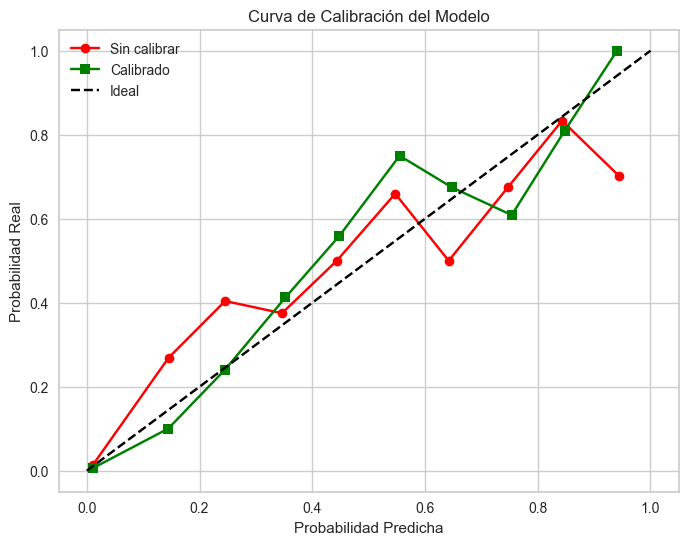

In [66]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Curvas de calibración
prob_true_orig, prob_pred_orig = calibration_curve(y_test_red, y_probs_red, n_bins=10)
prob_true_cal, prob_pred_cal = calibration_curve(y_test_red, y_probs_calibrated, n_bins=10)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_orig, prob_true_orig, marker='o', label='Sin calibrar', color='red')
plt.plot(prob_pred_cal, prob_true_cal, marker='s', label='Calibrado', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', label='Ideal', color='black')

plt.title('Curva de Calibración del Modelo')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Probabilidad Real')
plt.legend()
plt.grid(True)
plt.show()

**Respuesta 3.3.2:** La reducción en el Brier Score indica que hubo una mejora en la calidad de las probabilidades estimadas tras la calibracion. Además, en la figura se puede apreciar una comparación visual entre las curvas de calibración del modelo original y del modelo calibrado, junto con la curva ideal. Se observa que el modelo calibrado (línea verde) se aproxima mejor a la diagonal ideal en comparación con el modelo sin calibrar (línea roja), particularmente en los rangos medio y alto de probabilidades donde se acerca mucho a la curva ideal. Esto sugiere que, tras la calibración el modelo entrega estimaciones más consistentes.

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>